<a href="https://colab.research.google.com/github/howardddwu/CSC474Final/blob/main/CSC474Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import iplot
import numpy as np 
import matplotlib.pyplot as plt  
from sklearn import datasets, linear_model

In [2]:
happiness_df = pd.read_csv("https://raw.githubusercontent.com/howardddwu/CSC474Final/main/data/happiness-cantril-ladder.csv")
air_df = pd.read_csv("https://raw.githubusercontent.com/howardddwu/CSC474Final/main/data/DP_LIVE_13042022192159553.csv")

In [10]:
# happiness_df.head(5)
happiness = happiness_df.query("Year == 2019")
happiness = happiness.drop(columns=['Entity'])
happiness = happiness.rename({'Code':'LOCATION','Life satisfaction in Cantril Ladder (World Happiness Report 2021)':'happiness_level'},axis='columns')
happiness = happiness.drop_duplicates()
print(happiness)

     LOCATION  Year  happiness_level
11        AFG  2019            2.375
23        ALB  2019            4.995
32        DZA  2019            4.745
50        ARG  2019            6.086
65        ARM  2019            5.488
...       ...   ...              ...
1892      VEN  2019            5.081
1907      VNM  2019            5.467
1919      YEM  2019            4.197
1932      ZMB  2019            3.307
1947      ZWE  2019            2.694

[144 rows x 3 columns]


In [11]:
air = air_df.drop(columns = ['INDICATOR','SUBJECT','FREQUENCY','MEASURE','Flag Codes'])
air = air.query('TIME == 2019')
air = air.rename({'Value':'AQI'},axis='columns')
air = air.drop_duplicates('LOCATION')
air


,LOCATION,TIME,AQI
13,AUS,2019,6.74870
27,AUT,2019,12.22494
41,BEL,2019,12.72630
55,CAN,2019,7.09026
69,CZE,2019,16.96525
...,...,...,...
4745,TUR,2019,26.85069
4759,PSE,2019,32.55579
4773,TWN,2019,23.53350
4787,EA19,2019,12.20832


In [12]:
combined_df = pd.merge(happiness, air, on='LOCATION',how='inner')
combined_df.head

<bound method NDFrame.head of     LOCATION  Year  happiness_level  TIME       AQI
0        AFG  2019            2.375  2019  52.99812
1        ALB  2019            4.995  2019  18.45981
2        DZA  2019            4.745  2019  32.91557
3        ARG  2019            6.086  2019  13.84671
4        ARM  2019            5.488  2019  34.24106
..       ...   ...              ...   ...       ...
136      VEN  2019            5.081  2019  22.21524
137      VNM  2019            5.467  2019  20.19471
138      YEM  2019            4.197  2019  44.64506
139      ZMB  2019            3.307  2019  25.92371
140      ZWE  2019            2.694  2019  20.84664

[141 rows x 5 columns]>

In [13]:
# happiness level map
fig_cases = go.Figure(data = go.Choropleth(locations = combined_df['LOCATION'],
                                     z = (combined_df['happiness_level'].astype(int)),
                                     locationmode = 'ISO-3',
                                     colorscale = 'thermal',
                                     colorbar_title = "Happiness"))

fig_cases.update_layout(title_text = 'Happiness Level',
                  geo = dict(showframe = False,
                           showcoastlines = False,
                           projection_type = 'equirectangular'))
iplot(fig_cases)

In [14]:
# air quality indicator map
fig_cases = go.Figure(data = go.Choropleth(locations = combined_df['LOCATION'],
                                     z = (combined_df['AQI'].astype(int)),
                                     locationmode = 'ISO-3',
                                     colorscale = 'thermal',
                                     colorbar_title = "Air Quality Indicator"))

fig_cases.update_layout(title_text = 'Air Quality Indicator',
                  geo = dict(showframe = False,
                           showcoastlines = False,
                           projection_type = 'equirectangular'))
iplot(fig_cases)

In [8]:
# scatter plot happiness level vs AQI
import plotly.express as px
fig = px.scatter(combined_df, x="happiness level", y="AQI")
fig.show()

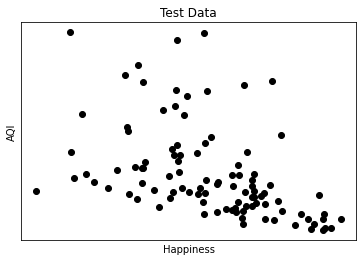

In [47]:
X = combined_df['happiness_level']
Y = combined_df['AQI']

X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)

# Split the data into training/testing sets
X_train = X[:-100]
X_test = X[-100:]

# Split the targets into training/testing sets
Y_train = Y[:-100]
Y_test = Y[-100:]

# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.title('Test Data')
plt.xlabel('Happiness')
plt.ylabel('AQI')
plt.xticks(())
plt.yticks(())

plt.show()




The Coefficient is -9.428490656917512
The intercept is 82.0686681256661
Equation: y = -9.428490656917512x + 82.0686681256661


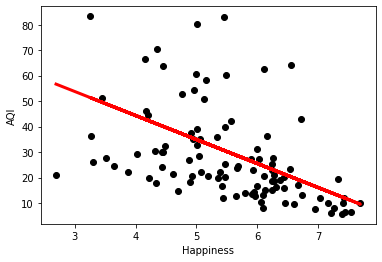

In [55]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Plot outputs
plt.xlabel('Happiness')
plt.ylabel('AQI')
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)


#output

coef = regr.coef_[0][0]
intercept = regr.intercept_[0]
print(f"The Coefficient is {coef}")
print(f"The intercept is {intercept}")
print(f"Equation: y = {coef}x + {intercept}")